In [2]:
from resnet import *
from PIL import Image
from torchvision import transforms as T
import numpy as np
import os
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torch.nn as nn

In [7]:
import imgaug as ia
from imgaug import augmenters as iaa


def hard(image_iteration):

    iteration = image_iteration/32
    frequency_factor = min(0.05 + float(iteration)/200000.0, 1.0)
    color_factor = min(float(iteration)/1000000.0, 1.0)
    dropout_factor = 0.198667 + (0.03856658 - 0.198667) / (1 + (iteration / 196416.6) ** 1.863486)

    blur_factor = min(0.5 + (0.5*iteration/100000.0), 1.0)

    add_factor = 10 + 10*iteration/100000.0

    multiply_factor_pos = 1 + (2.5*iteration/200000.0)
    multiply_factor_neg = 1 - (0.91 * iteration / 500000.0)

    contrast_factor_pos = 1 + (0.5*iteration/500000.0)
    contrast_factor_neg = 1 - (0.5 * iteration / 500000.0)

    augmenter = iaa.Sequential([

        iaa.Sometimes(frequency_factor, iaa.GaussianBlur((0, blur_factor))),
        # blur images with a sigma between 0 and 1.5
        iaa.Sometimes(frequency_factor, iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, dropout_factor),
                                                                  per_channel=color_factor)),
        # add gaussian noise to images
        iaa.Sometimes(frequency_factor, iaa.CoarseDropout((0.0, dropout_factor), size_percent=(
            0.08, 0.2), per_channel=color_factor)),
        # randomly remove up to X% of the pixels
        iaa.Sometimes(frequency_factor, iaa.Dropout((0.0, dropout_factor), per_channel=color_factor)),
        # randomly remove up to X% of the pixels
        iaa.Sometimes(frequency_factor,
                      iaa.Add((-add_factor, add_factor), per_channel=color_factor)),
        # change brightness of images (by -X to Y of original value)
        iaa.Sometimes(frequency_factor,
                      iaa.Multiply((multiply_factor_neg, multiply_factor_pos), per_channel=color_factor)),
        # change brightness of images (X-Y% of original value)
        # iaa.Sometimes(frequency_factor, iaa.ContrastNormalization((contrast_factor_neg, contrast_factor_pos),
        #                                                                per_channel=color_factor)),
        iaa.Sometimes(frequency_factor, iaa.contrast.LinearContrast((contrast_factor_neg, contrast_factor_pos),
                                                                    per_channel=color_factor)),
        # improve or worsen the contrast
        iaa.Sometimes(frequency_factor, iaa.Grayscale((0.0, 1))),  # put grayscale

    ],
        random_order=True  # do all of the above in random order
    )

    return augmenter

In [7]:
perception = resnet34(pretrained=True)

for name, params in perception.named_parameters():
    print(str(name) + ": " + str(params.requires_grad))

conv1.weight: True
bn1.weight: True
bn1.bias: True
layer1.0.conv1.weight: True
layer1.0.bn1.weight: True
layer1.0.bn1.bias: True
layer1.0.conv2.weight: True
layer1.0.bn2.weight: True
layer1.0.bn2.bias: True
layer1.1.conv1.weight: True
layer1.1.bn1.weight: True
layer1.1.bn1.bias: True
layer1.1.conv2.weight: True
layer1.1.bn2.weight: True
layer1.1.bn2.bias: True
layer1.2.conv1.weight: True
layer1.2.bn1.weight: True
layer1.2.bn1.bias: True
layer1.2.conv2.weight: True
layer1.2.bn2.weight: True
layer1.2.bn2.bias: True
layer2.0.conv1.weight: True
layer2.0.bn1.weight: True
layer2.0.bn1.bias: True
layer2.0.conv2.weight: True
layer2.0.bn2.weight: True
layer2.0.bn2.bias: True
layer2.0.downsample.0.weight: True
layer2.0.downsample.1.weight: True
layer2.0.downsample.1.bias: True
layer2.1.conv1.weight: True
layer2.1.bn1.weight: True
layer2.1.bn1.bias: True
layer2.1.conv2.weight: True
layer2.1.bn2.weight: True
layer2.1.bn2.bias: True
layer2.2.conv1.weight: True
layer2.2.bn1.weight: True
layer2.2.bn1

In [9]:
data = np.load(os.path.join("/storage/scratch/e17-4yp-autonomous-driving/g04/TCPDataset/tcp_carla_data/town01/packed_data.npy"), allow_pickle=True).item()

In [10]:
_im_transform = T.Compose([T.ToTensor(), T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])])

In [11]:
im = _im_transform(hard(0).augment_image(np.array(Image.open('/storage/scratch/e17-4yp-autonomous-driving/g04/TCPDataset/tcp_carla_data/town01/routes_town01_03_28_19_48_38/rgb/0009.png'))))

In [12]:
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

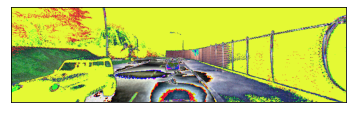

In [13]:
show(im)

In [2]:
data = np.load(os.path.join("/storage/scratch/e17-4yp-autonomous-driving/g04/TCPDataset/tcp_carla_data/town01/routes_town01_03_28_17_13_31/supervision/0067.npy"), allow_pickle=True).item()

In [3]:
data.keys()

dict_keys(['action', 'value', 'action_mu', 'action_sigma', 'features', 'speed', 'target_gps', 'target_command', 'should_brake', 'only_ap_brake'])

In [6]:
data['target_gps']

array([-0.0009895 ,  0.00079399,  0.        ], dtype=float32)

In [5]:
data = np.load(os.path.join("/storage/scratch/e17-4yp-autonomous-driving/g04/TCP/data/data_collect_town01_results/routes_town01_06_12_12_01_09/supervision/0016.npy"), allow_pickle=True).item()

In [3]:
data.keys()

dict_keys(['action', 'value', 'action_mu', 'action_sigma', 'features', 'speed', 'target_gps', 'target_command', 'should_brake', 'only_ap_brake'])